# DA 218o Worksheet 3: Probability Distributions

Please download this notebook in your current working directory for this jupyter notebook.

In [1]:
# Required libraries
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Bernoulii distribution

The Bernoulli distribution is the probability distribution of a random variable which takes the value 1 with probability $p$ (probability of success) and the value 0 with probability $q = 1 − p$.

The probability mass function $f$ of this distribution, over possible outcomes $x$, is

$${\displaystyle f(k;p)={\begin{cases}p&{\text{if }}x=1,\\[6pt]1-p&{\text{if }}x=0.\end{cases}}}$$

In [2]:
#create a bernoulli class
 
class bernoulli():
    def pmf(x,p):
        """
        probability mass function        
        """
        # solution goes here 
        f= (p**x)*((1-p)**(1-x))
        
        return f
    
    def mean(p):
        """
        expected value of bernoulli random variable
        """
        return p
    
    def var(p):
        """
        variance of bernoulli random variable
        """
        return p*(1-p)
    
    
    def rvs(p,size):
        """
        random variates
        """
        rvs = np.array([])
        for i in range(0,size):
            if np.random.rand() <= p:
                a=1
                rvs = np.append(rvs,a)
            else:
                a=0
                rvs = np.append(rvs,a)
        return rvs

**Example:** Suppose that a fast pace bowler in Cricket has a 0.4 probability of being injured. Generate random variate 10 times, and compute the expectation and variance.

In [3]:
#X = 1 if an injury happens, and X = 0 otherwise.

p=0.4 
print(bernoulli.rvs(p,size=10))

#print expected value
print(bernoulli.mean(p))


#print variance
print(bernoulli.var(p))

[0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
0.4
0.24


In [7]:
# p=0.5 i.e. fair coin
bernoulli.rvs(p=0.5,size=10)

array([1., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

`Q: What do you think about the expected distributions of 1's and 0's?`

Answer: ...

Experiment with $N$ number of trials to see how the probability distribution gradually centers around 0.5.

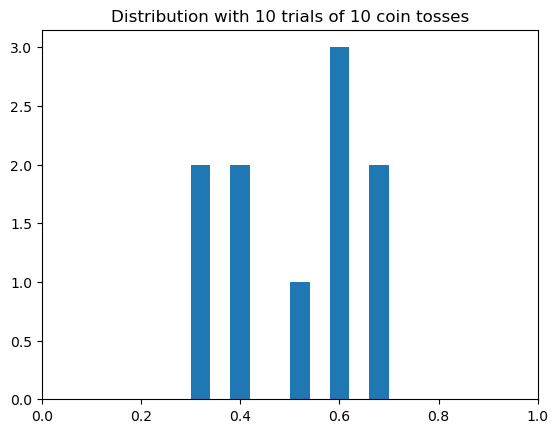

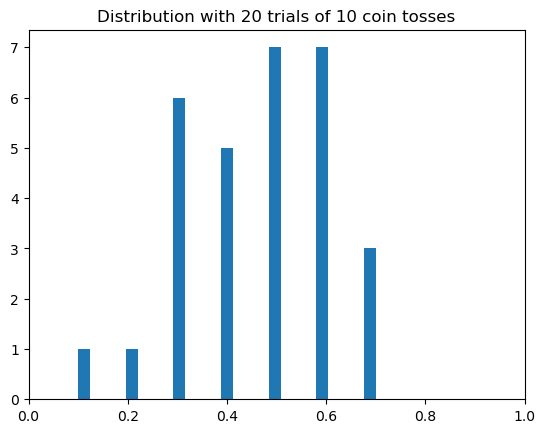

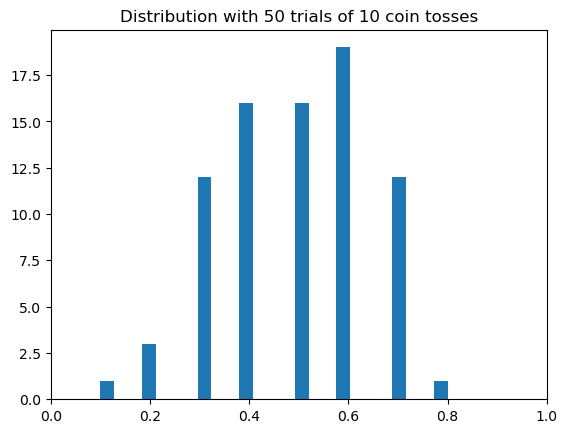

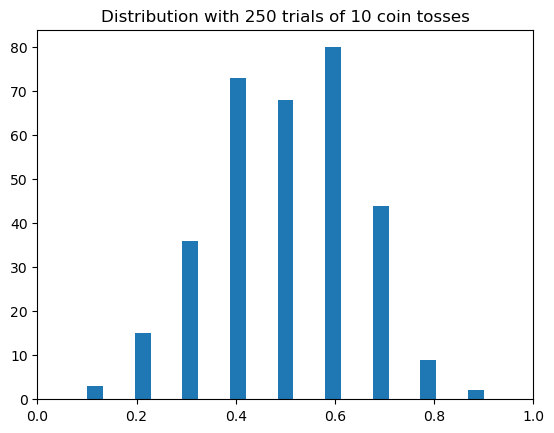

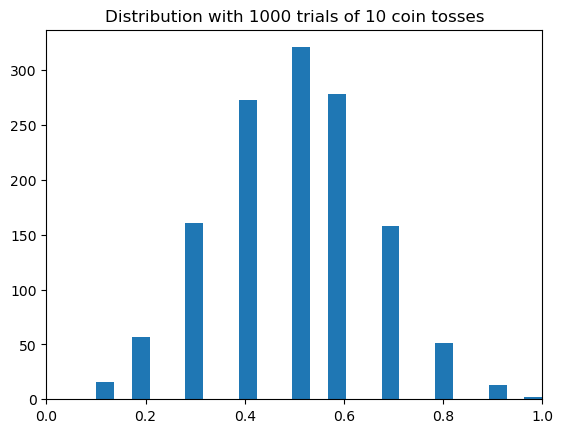

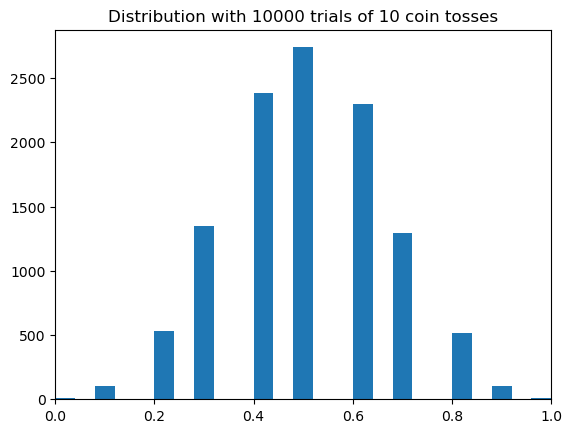

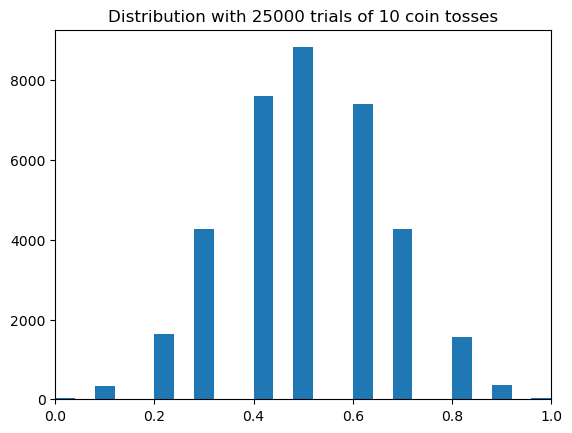

In [10]:
N_trials = [10,20,50,250,1000,10000,25000] # Number of trials
prob= 0.5 # Fair coin 
Ave = [] # Empty list to store the average of the random variates

# Generate 10 variates every time and take the average. That should be # of 1's i.e. 0.5 for a fair coin.

for i in N_trials:
    for n in range(1,i+1):
        Ave.append(np.mean(bernoulli.rvs(p=prob,size=10)))
    if (i==10):
        plt.title("Distribution with {} trials of 10 coin tosses".format(i))
        plt.hist(Ave,bins=10)
        plt.xlim(0.0,1.0)
        plt.show()
    else:
        plt.title("Distribution with {} trials of 10 coin tosses".format(i))
        plt.hist(Ave,bins=25)
        plt.xlim(0.0,1.0)
        plt.show()

What insights do you get from above plots?

Lets use bernoulli function from `scipy` package.

In [11]:
from scipy.stats import bernoulli
# p=0.5 i.e. fair coin
bernoulli.rvs(p=0.5,size=10)
# p=0.3 i.e. more tails than heads
bernoulli.rvs(p=0.2,size=10)

/Users/punitrathore/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

## Binomial distribution

The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each with its own boolean-valued outcome.

The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. For a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution. 

In general, if the random variable $X$ follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write X ~ Binom(n, p). The probability of getting exactly $k$ successes in $n$ trials is given by the probability mass function:

$${\Pr(k;n,p)=\Pr(X=k)={n \choose k}p^{k}(1-p)^{n-k}}$$

for k = 0, 1, 2, ..., n, where

$${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$$

In [12]:
#class BinomialDistribution(DiscreteDistribution):
class BinomialDistribution:
    
    """
    Computes a binomial distribution with parameters n (number of trials) and p (probability of success
    on a single trial, which remains the same from trial to trial).
    
    The sample space in this distribution is from 0 to the number of trials (n).
    """
    
    def __init__(self, n, p):
        self.sample_space = range(n + 1) #sample space
        self.n = n  #number of trials
        self.p = p  #probability of success
        self.q = 1 - p #probability of failure
        self.distribution = {}
        for event in self.sample_space:
            self.distribution[event] = self.calculateProbability(event) #calculate probability for each event present in distribution
        self.experiments = 0
        print(self.distribution)
    
    def calculateProbability(self, y):
        """
        This function calculates the probability of a random variable of interest Y, which is the
        number of successes observed during the n trials.
        """
        #your solution goes here
        exp =   self.p**y * self.q**(self.n -y)
        probab =  self.getCombinations(self.n, y)*exp # getCombinations is written below to compute nCr combinations
        return probab
    
    def getCombinations(self, n, r):
        """
        Computes the combination of n and variable r based on the formula for calculating probability.
        """
        return (np.math.factorial(n)/(np.math.factorial(n-r)))/np.math.factorial(r)
    
    def expectedValue(self):
        return self.n*self.p
       
    def variance(self):
        return self.n*self.p*self.q

    # don't worry about the following two functions. It is just for plotting distributions.
    
    def plot(self, order_labels = None):
        labels = []
        probabilities = []
        for event, probability in self.distribution.items():
            labels.append(event)
            probabilities.append(probability)
        
        if order_labels is not None:
            labels.sort(key = order_labels)
            probabilities = []
            for l in labels:
                probabilities.append(self.distribution[l])
                
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars
        fig, ax = plt.subplots()
        rects = ax.bar(x, probabilities, width, label = 'Probability')
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Probabilities')
        ax.set_title('Probability distribution')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        ax = self.autolabel(rects, ax)
        fig.tight_layout()
        plt.ylim(0, max(probabilities)*1.2)
        plt.show()
        
    def autolabel(self, rects, ax):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height =   math.trunc(1000 * rect.get_height()) / 1000 
            ax.annotate(str(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        return ax

In [13]:
def PlotPrintDistribution(probability_distribution):
    """
    This function plots the probability distribution passed as argument;
    also, prints its expected value and its variance.
    """
    probability_distribution.plot()
    print("Expected value: " + str(probability_distribution.expectedValue()))
    print("Variance: " + str(probability_distribution.variance()))

### Binomial example

**Example:** Experience has shown that 30\% of all persons in a society infected by COVID19 recovered by their own. A drug company has developed a new vaccinne. Ten people with the infection were selected at random and received the vaccination; nine recovered shortly thereafter. Suppose that the vaccination was absolutely worthless. What is the probability that at least nine of ten receiving the vaccination will recover?

In [14]:
example1 = BinomialDistribution(10, 0.3)

{0: 0.02824752489999998, 1: 0.12106082099999993, 2: 0.23347444049999985, 3: 0.2668279319999999, 4: 0.20012094899999994, 5: 0.10291934519999994, 6: 0.03675690899999998, 7: 0.009001691999999995, 8: 0.0014467004999999993, 9: 0.00013778099999999993, 10: 5.9048999999999975e-06}


In [15]:
nine_recoveries = example1.calculateProbability(9)
print("Probability of 9 recoveries is: " + str(nine_recoveries))

ten_recoveries = example1.calculateProbability(10)
print("Probability of 10 recoveries is: " + str(ten_recoveries))

print("Probability of at least 9 out of 10 people receiving vaccination will recover is: " + str(nine_recoveries+ten_recoveries))


Probability of 9 recoveries is: 0.00013778099999999993
Probability of 10 recoveries is: 5.9048999999999975e-06
Probability of at least 9 out of 10 people receiving vaccination will recover is: 0.00014368589999999993


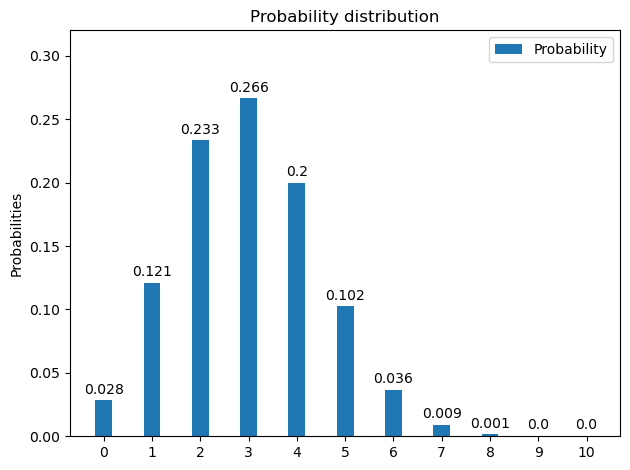

In [16]:
BinomialDistribution.plot(example1)

What should be the Expected value and variance?

In [17]:
print("Expected value: " + str(BinomialDistribution.expectedValue(example1)))
print("Variance: " + str(BinomialDistribution.variance(example1)))

Expected value: 3.0
Variance: 2.0999999999999996


**Example:** Suppose that a lot of 5000 electrical fuses contains 5% defectives. If a sample of
5 fuses is tested, find the probability of observing at least one defective.

In [18]:
example2 = BinomialDistribution(5, .05)

{0: 0.7737809374999998, 1: 0.2036265625, 2: 0.021434375, 3: 0.0011281250000000002, 4: 2.9687500000000007e-05, 5: 3.125000000000001e-07}


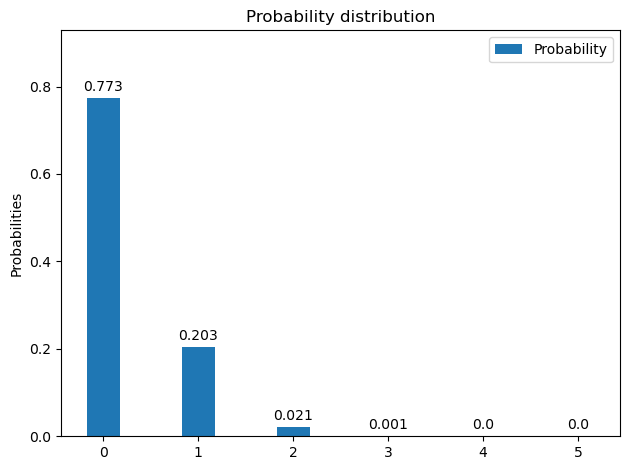

{0: 0.7737809374999998, 1: 0.2036265625, 2: 0.021434375, 3: 0.0011281250000000002, 4: 2.9687500000000007e-05, 5: 3.125000000000001e-07}
The probability that at least one fuse is defective is: 0.22621906250000023


In [21]:
BinomialDistribution.plot(example2)

example2 = BinomialDistribution(5, .05)
print("The probability that at least one fuse is defective is: " + str(1-example2.calculateProbability(0)))

In [20]:
print("Expected value: " + str(BinomialDistribution.expectedValue(example2)))
print("Variance: " + str(BinomialDistribution.variance(example2)))

Expected value: 0.25
Variance: 0.2375


Lets check if our implementation for Binomial distribution is correct. A valid binomial distribution should integrate to 1 over sample space.

In [22]:
def probabilityOfSampleSpace(example2):
        sum = 0
        for event in example2.sample_space:
            sum += example2.calculateProbability(event)

        return sum

In [23]:
print("Sample space probability: " + str(probabilityOfSampleSpace(example2)))

Sample space probability: 0.9999999999999998


`Q: Implement Bernoulli distribution with probability of success= 0.3?`

In [ ]:
example3 = #your solution goes here

The Binomial distribution summarizes the number of successes in a given number of Bernoulli trials n, with a given probability of success for each trial p.


We can simulate the Bernoulli process with randomly generated cases and count the number of successes over the given number of trials. We can demonstrate this with a Bernoulli process where the probability of success is 30% or P(x=1) = 0.3 and the total number of trials is 100 (n=100). Lets use binomial function from numpy package.

In [24]:
from numpy.random import binomial
# define the parameters of the distribution
p = 0.3
n = 100

# run a single simulation
success = binomial(n, p)
print('Total Success: %d' % success)

Total Success: 28


We would expect that 30 cases out of 100 would be successful given the chosen parameters (n * p or 100 * 0.3).

In [25]:
# run again
p = 0.3
n = 100

# run a single simulation
success = binomial(n, p)
print('Total Success: %d' % success)

Total Success: 26


A different random sequence of 100 trials will result each time the code is run, so your specific results will differ. Try running the example a few times.

In this case, we can see that we get slightly less than the expected 30 successful trials

In [26]:
# calculate mean (expected value) and variance of a binomial distribution

# This can be achieved via the binom (scipy) function.
from scipy.stats import binom

p = 0.3
n = 100

mean, var= binom.stats(n, p, moments='mv')
print('Mean=%.3f, Variance=%.3f' % (mean, var))

Mean=30.000, Variance=21.000


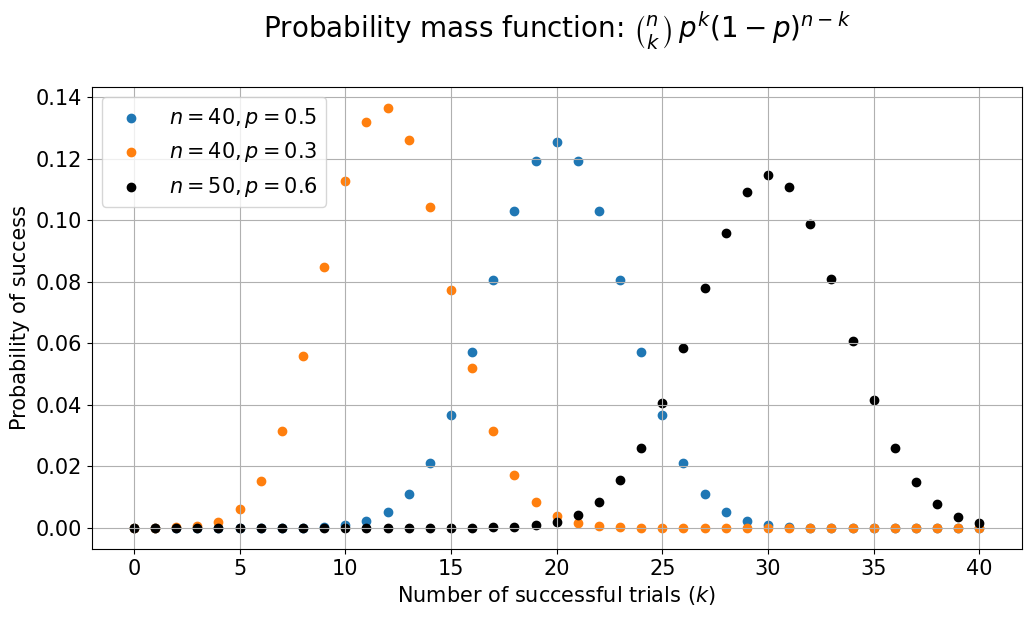

In [27]:
n=40
p=0.5
rv = binom(n,p)
x=np.arange(0,41,1)
pmf1 = rv.pmf(x)

n=40
p=0.3
rv = binom(n,p)
x=np.arange(0,41,1)
pmf2 = rv.pmf(x)

n=50
p=0.6
rv = binom(n,p)
x=np.arange(0,41,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(12,6))
plt.title("Probability mass function: $\\binom{n}{k}\, p^k (1-p)^{n-k}$\n",fontsize=20)
plt.scatter(x,pmf1)
plt.scatter(x,pmf2)
plt.scatter(x,pmf3,c='k')
plt.legend(["$n=40, p=0.5$","$n=40, p=0.3$","$n=50, p=0.6$"],fontsize=15)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("Probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

## Multinomial distribution
The multinomial distribution is a generalization of the binomial distribution for a discrete variable with $K$ outcomes.

- Consider a sequence of $n$ independent trials in which each individual trial can have $k$ outcomes occurring with a constant probability value $p_1, p_2, \cdots , p_k$ with $p_1 + p_2 + \cdots + p_k = 1$
- The random variables $m_1, m_2, \cdots , m_k$ with $\sum_{i=1}^k m_i = n$ that count the number of occurrences of the $k$ respective outcomes are said to have a multinomial distribution


- Joint probability mass function of $m_1, m_2, \cdots , m_k$ :
\begin{equation}
    f(m_1, m_2, \cdots, m_k; p_1, \cdots , p_k , n) \sim Mult(p_1, \cdots, p_k,n) = \binom{n}{m_1,m_2,\cdots, m_k} p_1^{m_1} p_2^{m_2} \cdots p_k^{m_k}
\end{equation}
with $\sum_{i=1} ^ k m_i = n$ and $\sum_{i=1}^k p_i = 1$


In [47]:
from numpy.random import multinomial

# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0] # K=3 outcomes
n = 10000 # successive independent trials

# run a single simulation
Category = multinomial(n, p)

# summarize Category
for i in range(len(Category)):
    print('Category %d: %d' % (i+1, Category[i]))

Category 1: 3358
Category 2: 3312
Category 3: 3330


We would expect each category to have about 33 events. A different random sequence of 100 trials will result each time the code is run, so your specific results will differ. Try running the example a few times.



We can calculate the probability of this specific combination occurring in practice using the probability mass function



In [48]:
from scipy.stats import multinomial

# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
n = 10000

# define a specific number of outcomes from 100 trials
Category = [3358, 3312, 3330]

# calculate the probability for the Category
pr = multinomial.pmf(Category, n, p)

# print as a percentage
print('Category=%s, Probability: %.3f%%' % (Category, pr*100))

Category=[3358, 3312, 3330], Probability: 0.007%


## Normal (Gaussian) distribution

$
\text{Probability density function (PDF) of the normal distribution is} \\
$
$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x- \mu)^2}{2 \sigma^2}}\text{, where $x\in \mathbb{R}$}
$$

The random variable $X$ described by the PDF is a normal variable that follows a normal distribution with mean $\mu$ and variance $\sigma^2$.

$
\text{Normal distribution notation is} \\
$
$$
X \sim N(\mu,\sigma^2) \\
$$

The area under the curve equals 1.

$$
\int \limits _{-\infty} ^{+\infty}f(x)dx=1
$$

In [49]:
class NormalDistribution():
    
    """
    Computes a Normal distribution with parameters mu and sigma,
    which is the dispersion of mu.
    """   
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    
    def densityFunction(self, k):
        """
        Computes the density function of an event k present in an interval of observations.
        """
        exp = np.exp(-(((k - self.mu)**2)/(2*self.sigma**2)))
        return ((1/(self.sigma*np.sqrt(2*np.pi)))*exp)

    def integrate(self, f, a, b, steps = 50, plot=False):      
        """          
        The probability of a random variable is computed by integrating the density function and represented
        as areas under curves. 
       
        """
        step_size = (b-a)/steps
        x = np.linspace(a, b, steps)
        y = f(x)
        integral = np.sum(y*step_size)
        if plot is True:
            self.plotFunction(x, y)
        return integral
    
    
    def probability(self, a, b):
        """
        Computes the probability of events in a given interval (a, b) and represents it as area under curve.
        """
        if self.sigma > 0:
            vectorized_density_function = np.vectorize(self.densityFunction)
            probability = self.integrate(vectorized_density_function, a, b, steps=100, plot=True)
            return probability
        else: pass
    
    
    def expectedValue(self):
        return self.mu
    
    def variance(self):
        return self.sigma**2
    
    def plotFunction(self, x,y):
        plt.plot(x,y, color='r')
        plt.fill_between(x,y)
        plt.xlim([x[0]-10*3,x[-1]+10*3]) ## 10*3 were substracted/added to have better view of filled area within Gaussian PDF
        plt.ylim([0, max(y)+0.01])
        plt.show()

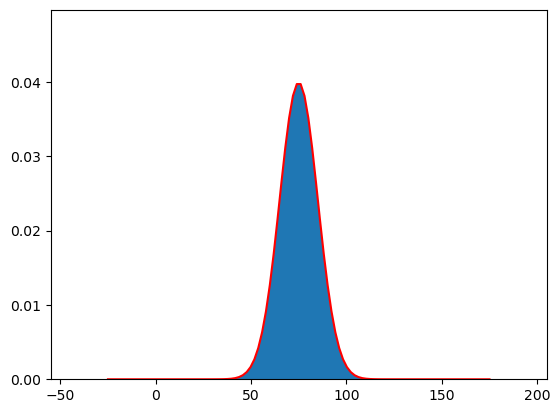

0.9900000000000004
Expected value:  75
Variance:  100


In [50]:
mu=75
sigma= 10
normal = NormalDistribution(mu , sigma)
print(normal.probability(mu-10**2, mu+10**2)) # we used +/- 100 to see full distribution on x axis
print("Expected value: ",normal.expectedValue())
print("Variance: ", normal.variance())

**Example:** The marks for CP218 course are normally distributed with mean 65 and standard deviation 25. What fraction of the scores lies between 80 and 90?

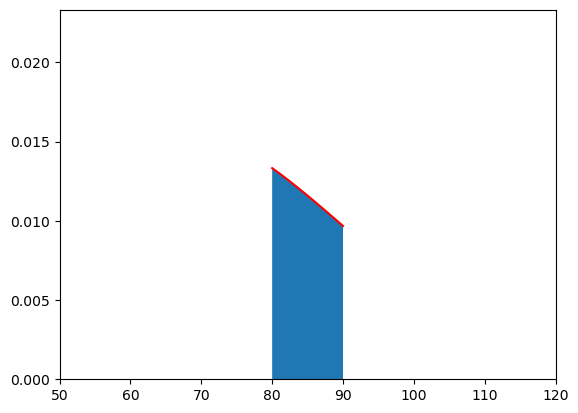

The fraction of scores that lies between 80 and 90 is: 0.1156


In [51]:
normal = NormalDistribution(mu = 65, sigma=25)
print("The fraction of scores that lies between 80 and 90 is: " + str(round(normal.probability(80, 90), 4)))

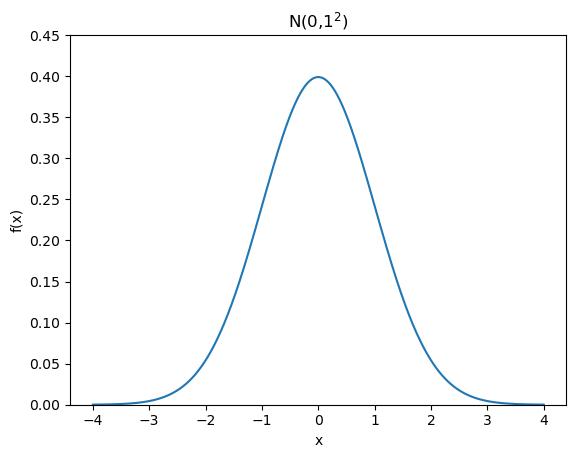

In [52]:
#Lets implement normal distribution using scipy package.

from scipy.stats import norm
x= np.arange(-4,4,0.001)
y= norm.pdf(x)

fig, ax = plt.subplots()
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, y)
ax.set_ylim(0,0.45)
plt.show()


**Example:**  Given the mean of 3 and the standard deviation of 2, compute the probability of 𝑃(𝑋<2)`

In [53]:
prob_less_than2=norm.cdf(2,3,2) #first argument is x for P(X<x), second is mean, and third is sigma
print(prob_less_than2)

0.3085375387259869


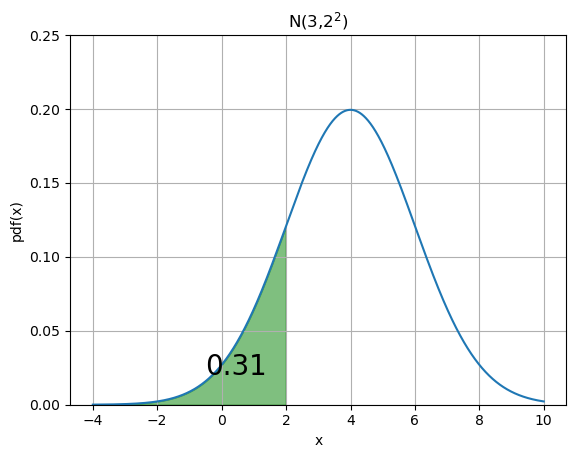

In [54]:
#let's plot graph

fig, ax = plt.subplots()

# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,4,2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,4,2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(prob_less_than2,2), fontsize=20)
plt.show()

`Q: Compute the probability 𝑃(0.5<𝑋<2) with a mean of 1 and a standard deviation of 2.`

In [55]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

0.2901687869569368

#### Multivariate Normal Distribution

Text(0.5, 1.0, 'pdf')

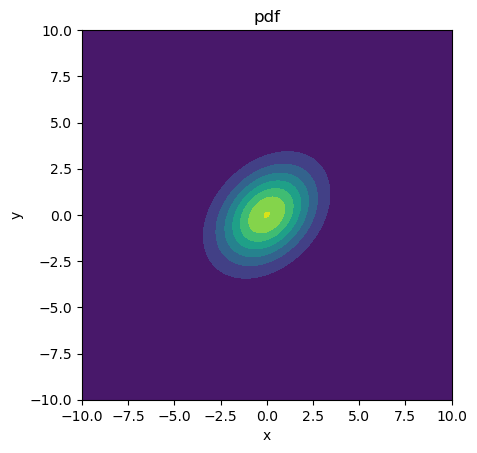

In [64]:
from scipy.stats import multivariate_normal


mean = np.array([0, 0])
cov  = np.array([[3,1],[1,3]])

x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))


rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)


fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')

/var/folders/3k/m0tqyd0x07bdlbtjsdz8hfbc0000gn/T/ipykernel_1884/1959481588.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


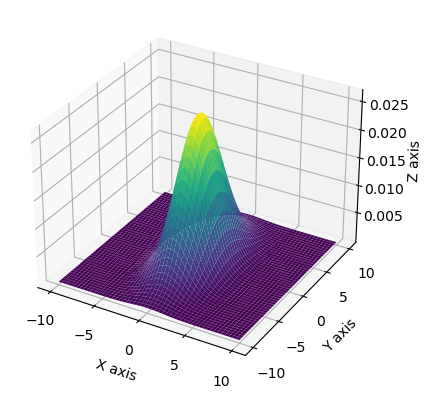

In [65]:
from mpl_toolkits.mplot3d import Axes3D


mean = np.array([0, 0])
cov  = np.array([[3,0],[0,12]])


# Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y



rv = multivariate_normal(mean,cov)

# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

`Q: How the plot will look for a full diagonal matrix and a Identify matrix ?`

## Gamma distribution

The probability density function for Gamma distributions using the **shape-scale parametrization** is

$$
f(x,\alpha,\beta)= \frac{x^{\alpha-1}e^{-x/\beta}}{\beta^{\alpha}\Gamma(\alpha)}
$$

Parameter $\alpha$ is called the shape parameter, and $\beta$ is generally called the scale parameter (reciprocal of the rate parameter). 

Note that, in class we discussed **shape-rate parameterization** of Gamma distibution, which is as follows

$$
f(x,\alpha,\beta)= \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$$

where $\beta$ is rate parameter.

**The gamma distribution is often used for modeling waiting times, life testing, insurance claims, for mentioning some examples. For example, it is commonly used in finance, for elapsed times, You can think of $\alpha$ as the number of events you are waiting for ($\alpha$ is a real number), and $\beta$ as the mean waiting time until the first event.** 

Here, we are going to implement **shape-scale parametrization** of Gamma distribution.

In [68]:
class GammaDistribution():
    
    """
    Computes a Gamma distribution with parameters alpha and beta. Parameter beta is generally called the scale
    parameter, and alpha the shape parameter.
    """
    
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def densityFunction(self, k):
        """
        Computes the density function for a given event k present in the interval (a,b).
        """
        if k >= 0:
            numerator = (k**(self.alpha-1))*(np.exp(-(k/self.beta))) 
            denominator = (self.beta**self.alpha)*math.gamma(self.alpha)         #use math.gamma function for gamma function
            return numerator/denominator
        else: return 0
        
    def integrate(self, f, a, b, steps = 50, plot=False):      
        """          
        The probability of a random variable is computed by integrating the density function and represented
        as areas under curves. 
       
        """
        step_size = (b-a)/steps
        x = np.linspace(a, b, steps)
        print(f)
        y = f(x)
        integral = np.sum(y*step_size)
        if plot is True:
            self.plotFunction(x, y)
        return integral
    
    def probability(self, a, b):
        """
        Computes the probability of events in the interval (a,b) and represents it as area under curve.
        """
        if self.alpha > 0 and self.beta > 0:
            vectorized_density_function = np.vectorize(self.densityFunction)
            probability = self.integrate(vectorized_density_function, a, b, steps=1000, plot=True)
            return probability
        else: pass
    
    def expectedValue(self):
        return self.alpha*self.beta 
    
    def variance(self):
        return self.alpha*(self.beta**2)
    
    def plotFunction(self, x,y):
        plt.plot(x,y, color='r')
        plt.fill_between(x,y)
        plt.xlim([x[0],x[-1]])
        plt.ylim([0, max(y)+1])
        plt.show()

In [69]:
gamma = GammaDistribution(alpha = 4, beta=2)
print("Expected value: ",gamma.expectedValue())
print("Variance: ", gamma.variance())

Expected value:  8
Variance:  16


In [ ]:
print(gamma.probability(0, 100))

**Example** A health insurance company observes that death claims occur randomly in time with a mean of 0.3 years between claims. For its financial planning, they would like to estimate how long it will be before they pay out the 10th such claim.

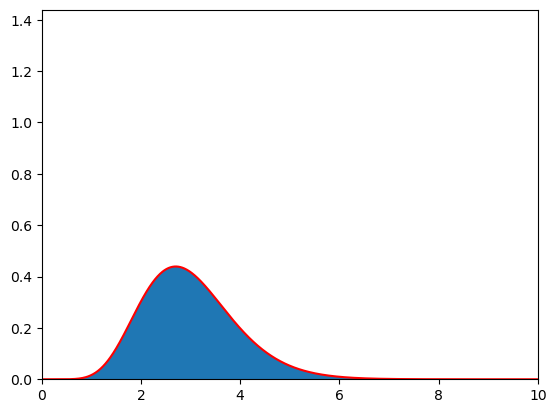

Probability that the 10th claim pays out is: 0.999
Expected value:  3.0
Variance:  0.8999999999999999


In [70]:
gamma = GammaDistribution(alpha = 10, beta=0.3)
print("Probability that the 10th claim pays out is: "+str(round(gamma.probability(0, 10), 4)))
print("Expected value: ",gamma.expectedValue())
print("Variance: ", gamma.variance())


`Q: Suppose the time spent by a randomly selected student in DA218o Programing workshop who uses Jupyter Notebook for programming has a gamma distribution with mean $30$ min and variance  $60 𝑚𝑖𝑛^2$. What is the probability that a student uses the Jupyter Notebook for at most $24$ min?` (Print the probability, expected value and variance in the same way as we did in above example)

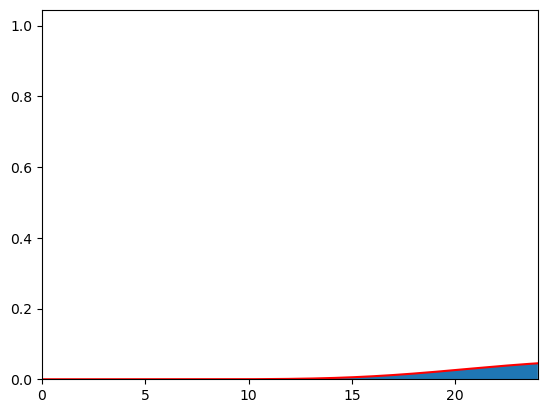

Probability that a student uses the Jupyter Notebook at most 24 minutes is: 0.2283
Expected value:  30
Variance:  60


In [71]:
gamma = GammaDistribution(alpha = 15, beta=2)
print("Probability that a student uses the Jupyter Notebook at most 24 minutes is: " + str(round(gamma.probability(0, 24), 4)))
print("Expected value: ",gamma.expectedValue())
print("Variance: ", gamma.variance())

`Q: Suppose the response time X for a student to get a reply from a Professor has an exponential distribution with expected response time equal to 5 mins. Find the probability that the response time is between 5 and 10 mins.` (Print the probability, expected value and variance in the same way as we did in above example)

In [ ]:
#Your solution goes here 

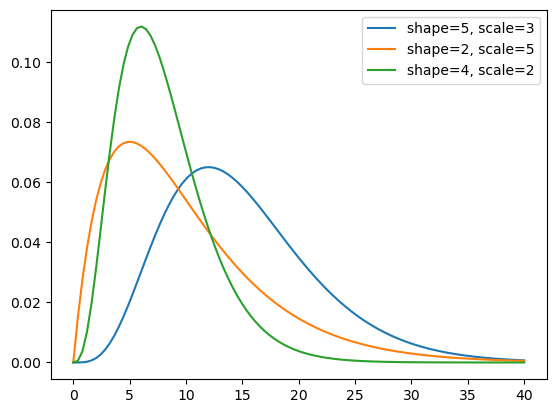

In [72]:
from scipy.stats import gamma


# consider a as parameta alpha and scale as beta.

#define three Gamma distributions
x = np.linspace(0, 40, 100)
y1 = gamma.pdf(x, a=5, scale=3)
y2 = gamma.pdf(x, a=2, scale=5)
y3 = gamma.pdf(x, a=4, scale=2)

plt.plot(x, y1, label= 'shape=5, scale=3')
plt.plot(x, y2, label='shape=2, scale=5')
plt.plot(x, y3, label='shape=4, scale=2')

plt.legend()

plt.show()

## Beta distribution
The probability density function for beta is:
    
        
$$
f(x,\alpha,\beta)= \frac{\Gamma(\alpha + \beta)x^{\alpha-1}(1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)}
$$

for $0 \leq x \leq 1$, $\alpha, \beta >0$   where $\Gamma$ is the gamma function. Beta distribution takes $\alpha$ and $\beta$  as shape parameters.

In [79]:
class BetaDistribution():
    
    """
    Computes the beta distribution with parameters alpha and beta. Both of them should be greater than 0.
    """
    
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def densityFunction(self, k):
        """
        Computes the density function of a given event in the interval (a,b). This event should be
        enclosed between 0 and 1. 
        """
        if k >= 0 and k <= 1:
            numerator = math.gamma(self.alpha+self.beta)*((k**(self.alpha-1))*((1-k)**(self.beta-1)))
            denominator = math.gamma(self.alpha)*math.gamma(self.beta)
            return numerator/denominator
        else: return 0
        
    def integrate(self, f, a, b, steps = 50, plot=False):      
        """          
        The probability of a random variable is computed by integrating the density function and represented
        as areas under curves. 
       
        """
        step_size = (b-a)/steps
        x = np.linspace(a, b, steps)
        print(f)
        y = f(x)
        integral = np.sum(y*step_size)
        if plot is True:
            self.plotFunction(x, y)
        return integral
    
    def probability(self, a, b):
        if self.alpha > 0 and self.beta > 0:
            vectorized_density_function = np.vectorize(self.densityFunction)
            probability = self.integrate(vectorized_density_function, a, b, steps=1000, plot=True)
            return probability
        else: pass
    
    def expectedValue(self):
        return  self.alpha/(self.alpha+self.beta)
    
    def variance(self):
        return (self.alpha*self.beta)/(((self.alpha+self.beta)**2)*(self.alpha+self.beta+1))
    
    
    def plotFunction(self, x,y):
        plt.plot(x,y, color='r')
        plt.fill_between(x,y)
        plt.xlim([x[0],x[-1]]) 
        plt.ylim([0, max(y)+1])
        plt.show()

`Q: A student Tanya takes admission in CDS Department in IISc Banagalore, and is wondering what are her chances of getting Gold medal. If her probability of getting Gold medal can be modeled by a beta distribution with $\alpha = 3$ and $\beta = 2$, what is the probability that she has at most  $10\%$ chance of getting Gold medal?` (Print the probability, expected value and variance in the same way as we did in previous examples)

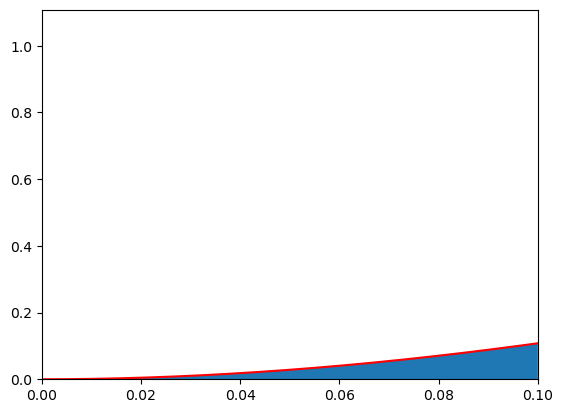

Probability that Tanya has at most a 10% chance of getting Gold medal is 0.0037
Expected value:  0.6
Variance:  0.04


In [75]:
beta = BetaDistribution(alpha = 3, beta=2)
print("Probability that Tanya has at most a 10% chance of getting Gold medal is " + str(round(beta.probability(0, 0.1), 4)))
print("Expected value: ",beta.expectedValue())
print("Variance: ", beta.variance())

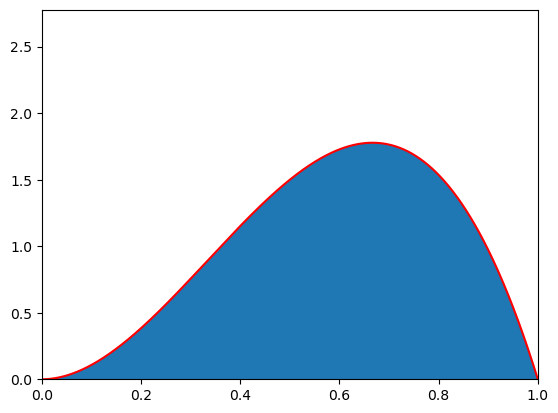

0.9989989989989991


In [80]:
print(beta.probability(0, 1))

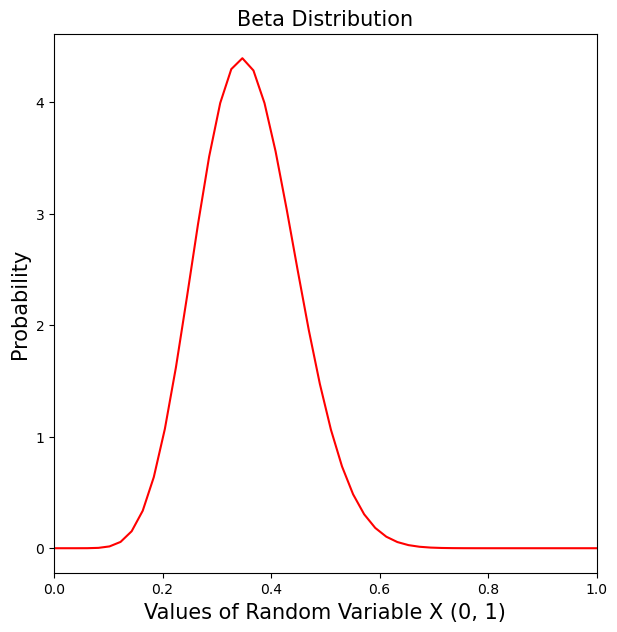

In [87]:
from scipy.stats import beta
#
# Set the shape paremeters
#
a, b = 10, 18

# Generate the value between
x = np.linspace(0, 1, 50)

# Plot the beta distribution
plt.figure(figsize=(7,7))
plt.xlim(0, 1)
plt.plot(x, beta.pdf(x, a, b), 'r-')
plt.title('Beta Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

#### Reference
1. Pattern Recognition and Machine Learning, Christopher Bishop, New York, Springer,  2006. (Chapter 1 and 2)
2. probability-distributions-with-examples, https://github.com/alejandropuerto